In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preview data
df = pd.read_csv("retail_sales.csv")
df.columns = ["date", "sales"]
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# Show first 5 rows
df.head()


,date,sales
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


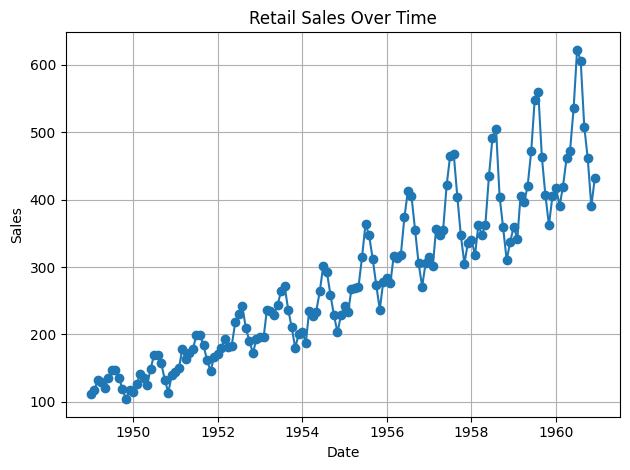

In [2]:
plt.plot(df['date'], df['sales'], marker='o')
plt.title("Retail Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Scale the 'sales' column to range [0, 1]
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(df['sales'].values.reshape(-1, 1))

# Function to create input sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

# Create sequences
sequence_length = 12
X, y = create_sequences(scaled_sales, sequence_length)

# Train-test split (80% train)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Show model architecture
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1
)


C:\Users\Preet\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Preet\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Preet\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0961 - val_loss: 0.3061
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0715 - val_loss: 0.2333
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0512 - val_loss: 0.1595
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0320 - val_loss: 0.0907
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0163 - val_loss: 0.0374
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0117 - val_loss: 0.0200
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0127 - val_loss: 0.0203
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0115 - val_loss: 0.0210
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0092 - val_loss: 0.0267
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0089 - val_loss: 0.0307
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - val_loss: 0.0252
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0076 - val_loss: 0.0214


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


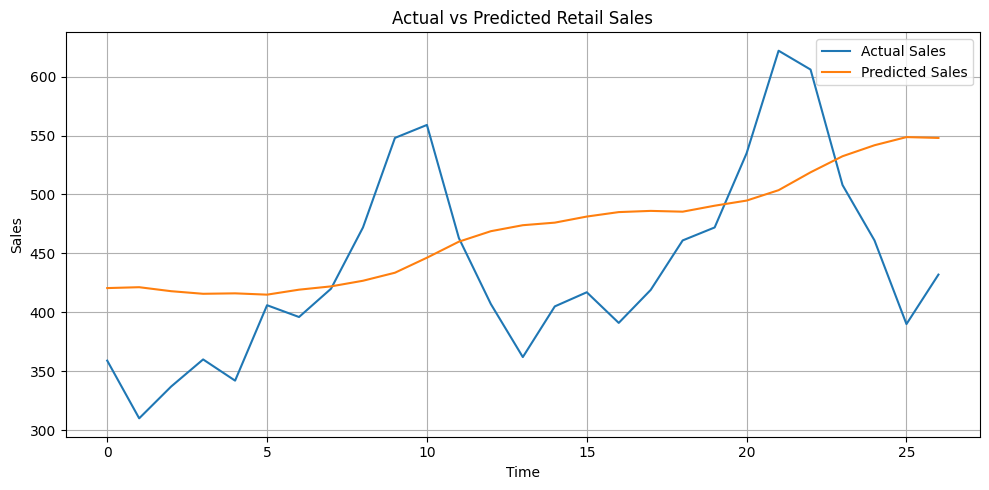

In [5]:
# Predict on test data
preds = model.predict(X_test)

# Inverse scale predictions and actuals
preds = scaler.inverse_transform(preds)
actual = scaler.inverse_transform(y_test)

# Plot predictions vs actuals
plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual Sales')
plt.plot(preds, label='Predicted Sales')
plt.title("Actual vs Predicted Retail Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
